In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

df = pd.read_csv('Ruter_data.csv', delimiter=';')

df = df.loc[df['Dato'] == '16/06/2020']

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
16,43111-2020-06-16T07:12:00+02:00,16/06/2020,Viken,Nordøst,Ullensaker,Furuset,Furuset kirke,Skole,Viken,3772,0,07:22:42,07:22:46,07:23:00,07:23:00,71,6
203,55030-2020-06-16T15:05:00+02:00,16/06/2020,Viken,Sør,Nordre Follo,Bindingsvann,Furuberget,Lokal,Viken,550,1,15:40:10,15:40:13,15:39:00,15:39:00,80,6
324,12010-2020-06-17T00:51:00+02:00,16/06/2020,Viken,Nordøst,Lørenskog,Postterminalen øst (i Skårerveien),Lindeveien,Lokal,Viken,120,1,25:07:09,25:07:17,25:05:00,25:05:00,72,-5
346,39009-2020-06-16T13:48:00+02:00,16/06/2020,Viken,Nordøst,Nittedal,Løvstad,Varingskollen,Lokal,Viken,390,0,:,13:57:17,13:56:00,13:56:00,115,4
500,55001-2020-06-17T00:30:00+02:00,16/06/2020,Viken,Nordøst,Rælingen,Fjellstadfeltet,Bye,Lokal,Viken,350,0,24:51:27,24:51:31,24:50:00,24:50:00,80,1


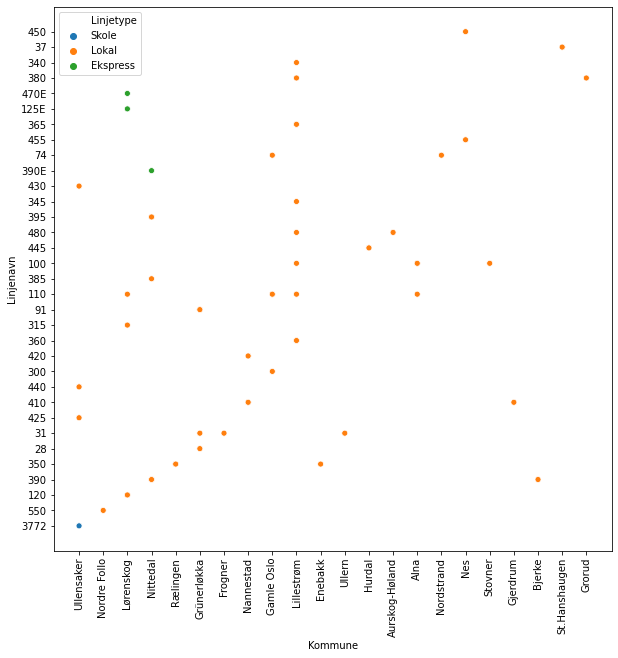

In [2]:
plt.figure(figsize=(10,10))
chart = sns.scatterplot(
    data=df,
    x='Kommune',
    y='Linjenavn',
    hue='Linjetype'
)

plt.xticks(
    rotation=90)

plt.show()

In [3]:
plt.figure(figsize=(10,10))
chart = sns.displot(
    data=df,
    x='Passasjerer_Ombord',
    binwidth=1
)

plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))

chart = sns.displot(
    data=df,
    x='Linjenavn',
    binwidth=1
)

plt.xticks(
    rotation=90)

plt.show()

In [ ]:
dataframe = pd.read_csv('Ruter_data.csv', delimiter=';')

plt.figure(figsize=(10,10))


planlagt = dataframe[["Dato", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]]
faktisk = dataframe[["Dato", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]]

# variable for loop
i = 0

#counters for how early or how delayed the busses are 
time0 = 0 #30-15 min delay
time1 = 0 #15-12 min delay
time2 = 0 #12-9 min delay
time3 = 0 #9-7 min delay
time4 = 0 #7-5 min delay
time5 = 0 #5-3 min delay
time6 = 0 #3-2 min delay
time7 = 0 #2-1 min delay
time8 = 0 #1 min-30 sec delay
time9 = 0 #30-0 sec delay
time10 = 0 #0-30 sec early
time11 = 0 #30 sec-1 min early
time12 = 0 #1-2 min early
time13 = 0 #2-5 min early

for row in planlagt.itertuples(): 
    datePlan = planlagt.at[i, 'Dato']
    dateFak = faktisk.at[i, 'Dato']
    tidPlan = planlagt.at[i, 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
    tidFak = faktisk.at[i, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']
    
    if tidPlan.startswith("24"):
        i+=1
        continue 
    if tidPlan.startswith("25"):
        i+=1
        continue
    if tidFak.startswith("24"):
        i+=1
        continue
    if tidFak.startswith("25"):
        i+=1
        continue
    if tidFak == ":":
        i+=1
        continue
        
    
    DateTidPlan = datePlan + " "+ tidPlan
    DateTidFak = dateFak + " "+ tidFak
    
    tidspunktPlan = datetime.datetime.strptime(DateTidPlan, "%d/%m/%Y %H:%M:%S")
    tidspunktFak = datetime.datetime.strptime(DateTidFak, "%d/%m/%Y %H:%M:%S")
    
    timestampPlan = datetime.datetime.timestamp(tidspunktPlan)
    timestampFak = datetime.datetime.timestamp(tidspunktFak)
    
    time = timestampFak-timestampPlan
    
    if 1800 >= time >= 900:
        time0+=1
    if 900 > time >= 720:
        time1+=1
    if 720 > time >= 540:
        time2+=1
    if 540 > time >= 420:
        time3+=1
    if 420 > time >= 300:
        time4+=1
    if 300 > time >= 180:
        time5+=1
    if 180 > time >= 120:
        time6+=1
    if 120 > time >= 60:
        time7+=1
    if 60 > time >= 30:
        time8+=1
    if 30 > time >= 0:
        time9+=1
    if 0 > time >= -30:
        time10+=1
    if -30 > time >= -60:
        time11+=1
    if -60 > time >= -120:
        time12+=1
    if -120 > time >= -300:
        time13+=1
    i+=1
    
    
intervals= ['30-15 min delay', '15-12 min delay', '12-9 min delay', '9-7 min delay',
           '7-5 min delay', '5-3 min delay', '3-2 min delay', '2-1 min delay', '1 min - 30 sec delay',
           '30-0 sec delay', '0-30 sec too early', '30 sec - 1 min too early',
           '1-2 min too early','2-5 min too early']
countings = [time0, time1, time2, time3, time4, time5, time6, time7, time8,
            time9, time10, time11, time12, time13]


x_pos = [j for j, _ in enumerate(intervals)]

plt.bar(x_pos, countings, color='blue')
plt.xlabel("How accurate the busses are")
plt.ylabel("How many busses inside the intervals")

plt.xticks(x_pos, intervals, rotation=90)
plt.show()